In [1]:
import os; import numpy as np
import pandas as pd; from iisignature import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# collect folder hierachy of dataset
relativedir = os.path.dirname(os.path.realpath('__file__')) + '/'
locations = list(os.walk('an4/wav/an4_clstk/'))
speakersloc = [relativedir + locations[0][0] + i for i in locations [0][1]]
speakersloc[0:3]

['/Users/gabrieldernbach/code/signature_audio/an4/wav/an4_clstk/mrjc2',
 '/Users/gabrieldernbach/code/signature_audio/an4/wav/an4_clstk/mskh',
 '/Users/gabrieldernbach/code/signature_audio/an4/wav/an4_clstk/ffmm']

In [3]:
# read in data and labels
audio = []
speakerid = []

for i,speaker in enumerate(speakersloc):
    for recording in os.listdir(speaker):
        location = speakersloc[i] + '/' + recording
        audio += [np.fromfile(location,'i2')]
        speakerid += [i]

In [4]:
# create DataFrame
X = pd.DataFrame(columns=['Audio','SpeakerID'])
for i in range(len(audio)):
    X.loc[i] = audio[i],speakerid[i]

In [5]:
# convert to float and zscore
def zscore(x):
    # use float to avoid overflow in signature method
    xfloat = x.astype('float64')
    # subtract mean
    xm = xfloat-xfloat.mean()
    # flatten to min/max 1.0
    xz = xm/np.absolute(xm).max()
    return xz
X['ZAudio'] = X['Audio'].apply(zscore)

In [6]:
# create a naive path transform
def naive2d(x):
    x1 = x
    x2 = np.linspace(0,len(x)-1,len(x))
    return np.vstack((x2,x1)).T
X['2D'] = X['ZAudio'].apply(naive2d)

In [7]:
# create leadlag path from audio content
def leadlag(x):
    x1 = x
    x2 = np.roll(x1,1)
    x2[0] = x2[1]
    return np.vstack((x1,x2)).T
X['LeadLag'] = X['ZAudio'].apply(leadlag)

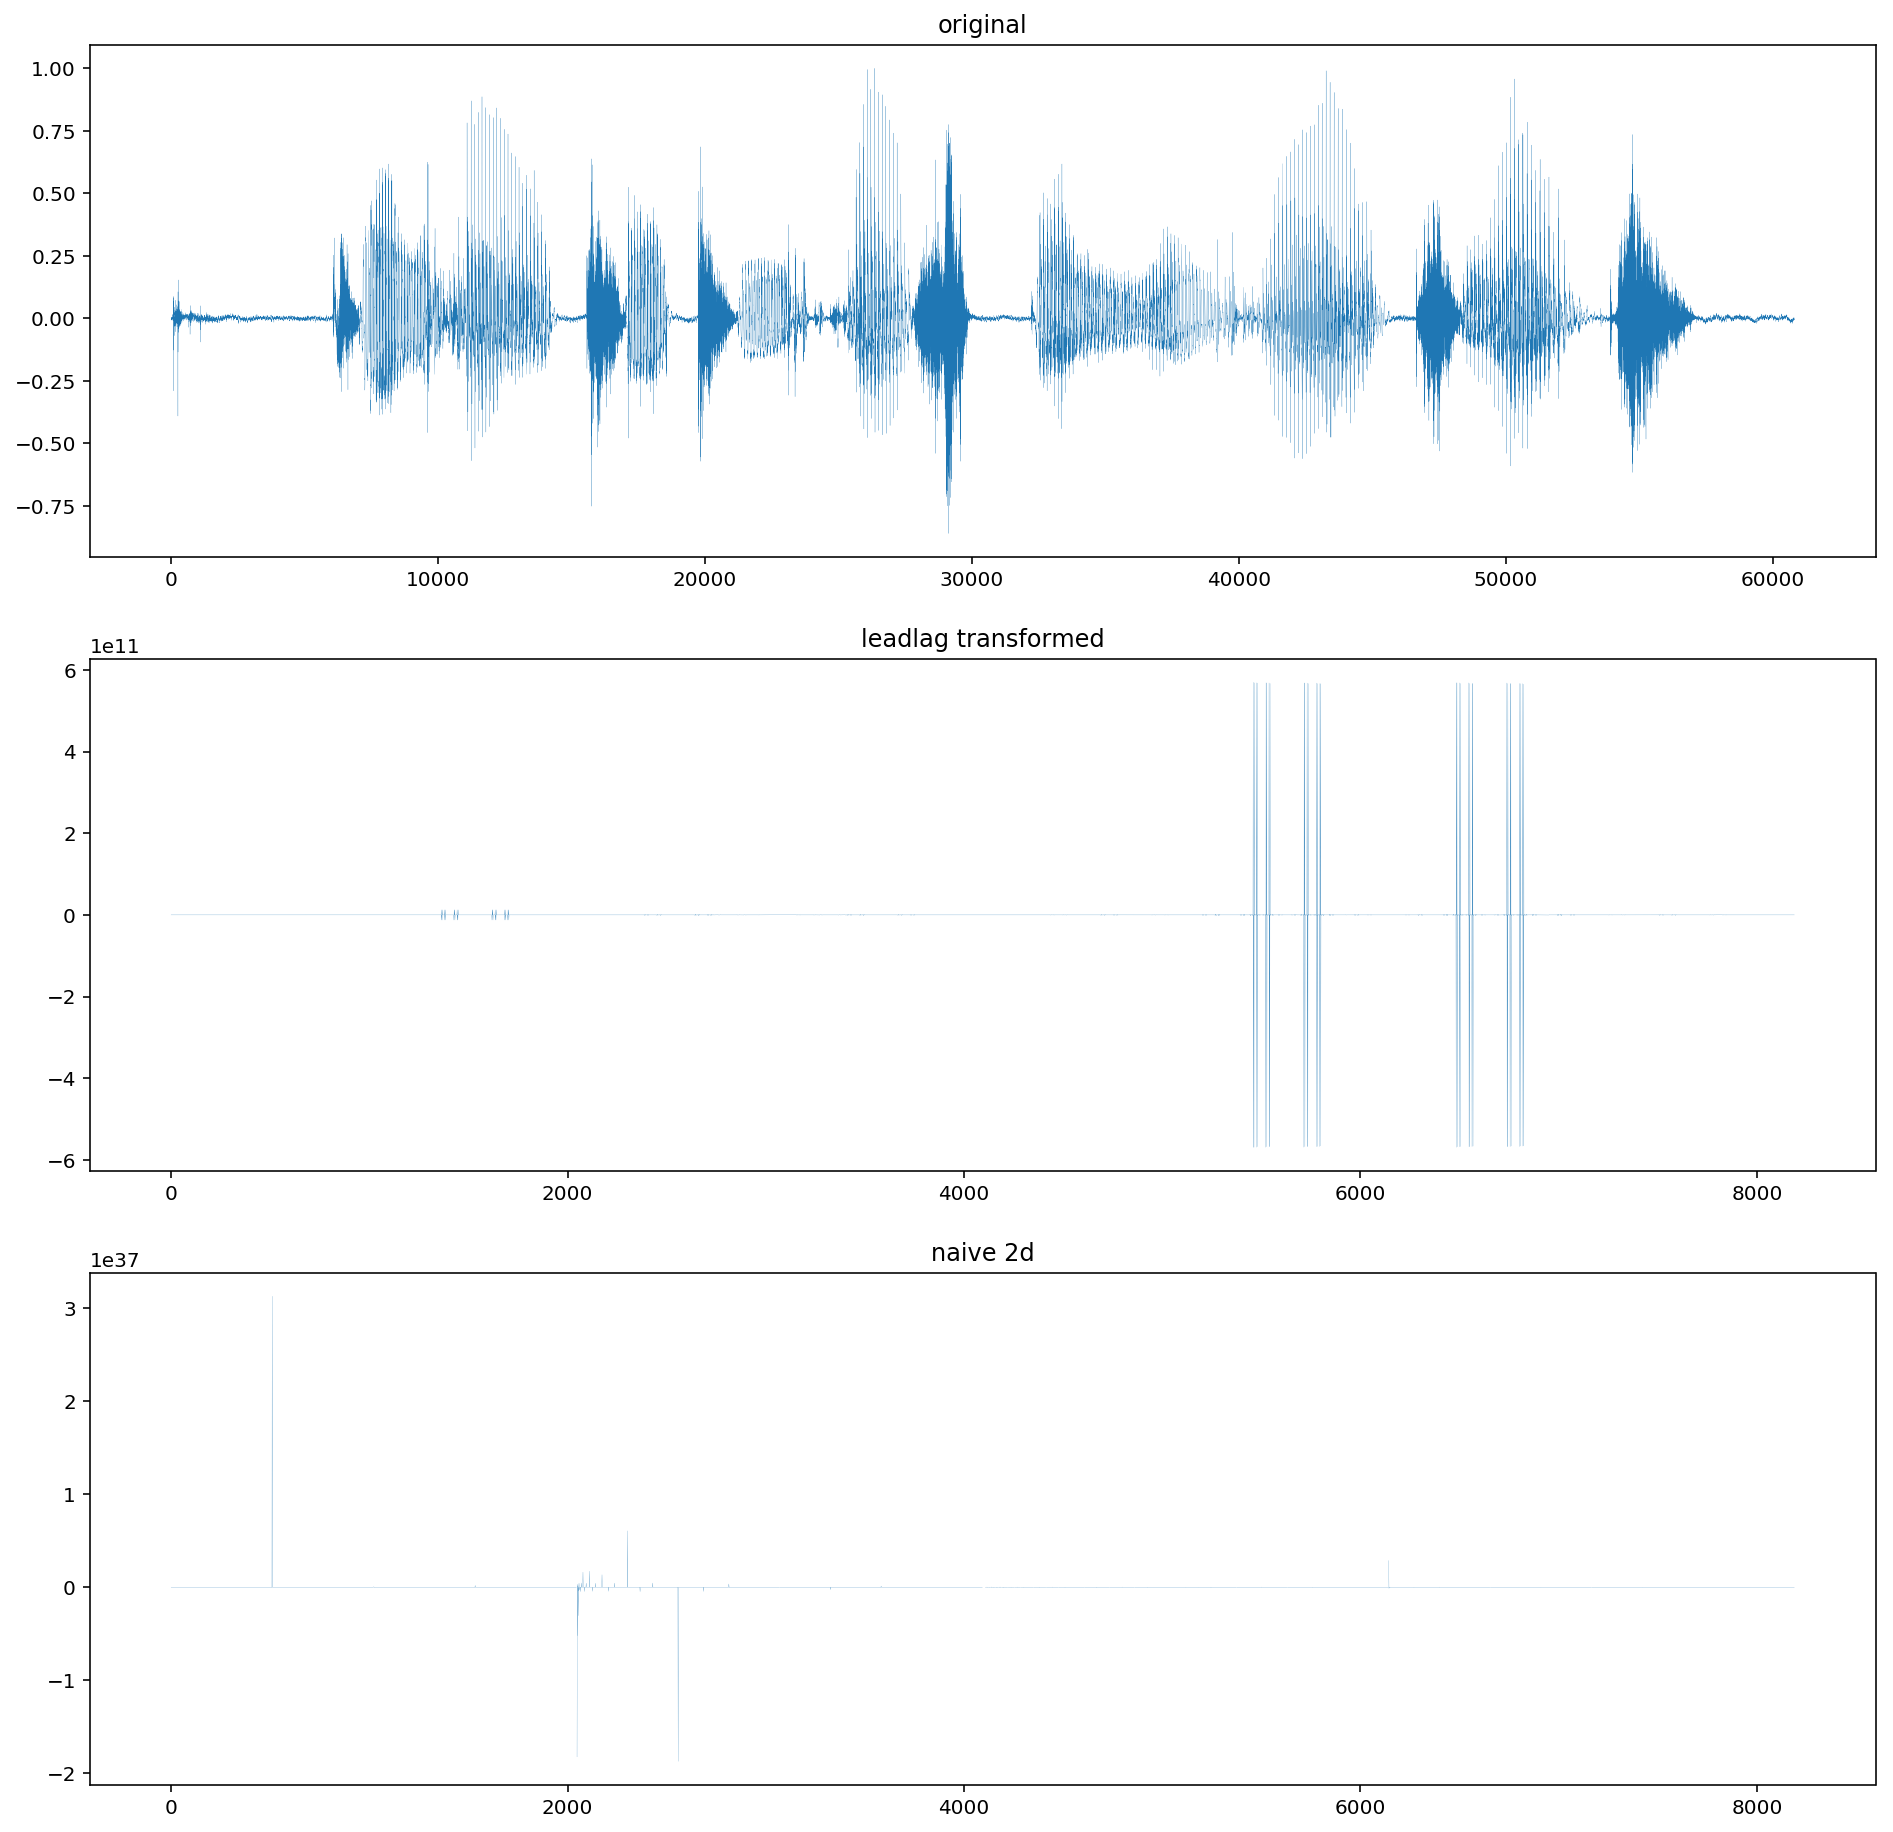

In [8]:
def plotSig(fileno,order=12):
    lw = 0.1 #linewidth
    plt.figure(figsize=(16,16))
    plt.subplot(311); plt.title('original')
    plt.plot(X.iloc[fileno]['ZAudio'],linewidth=lw);
    plt.subplot(312); plt.title('leadlag transformed')
    plt.plot(sig(X.iloc[fileno]['LeadLag'],order),linewidth=lw);
    plt.subplot(313); plt.title('naive 2d')
    plt.plot(sig(X.iloc[fileno]['2D'],order),linewidth=lw);
plotSig(8)

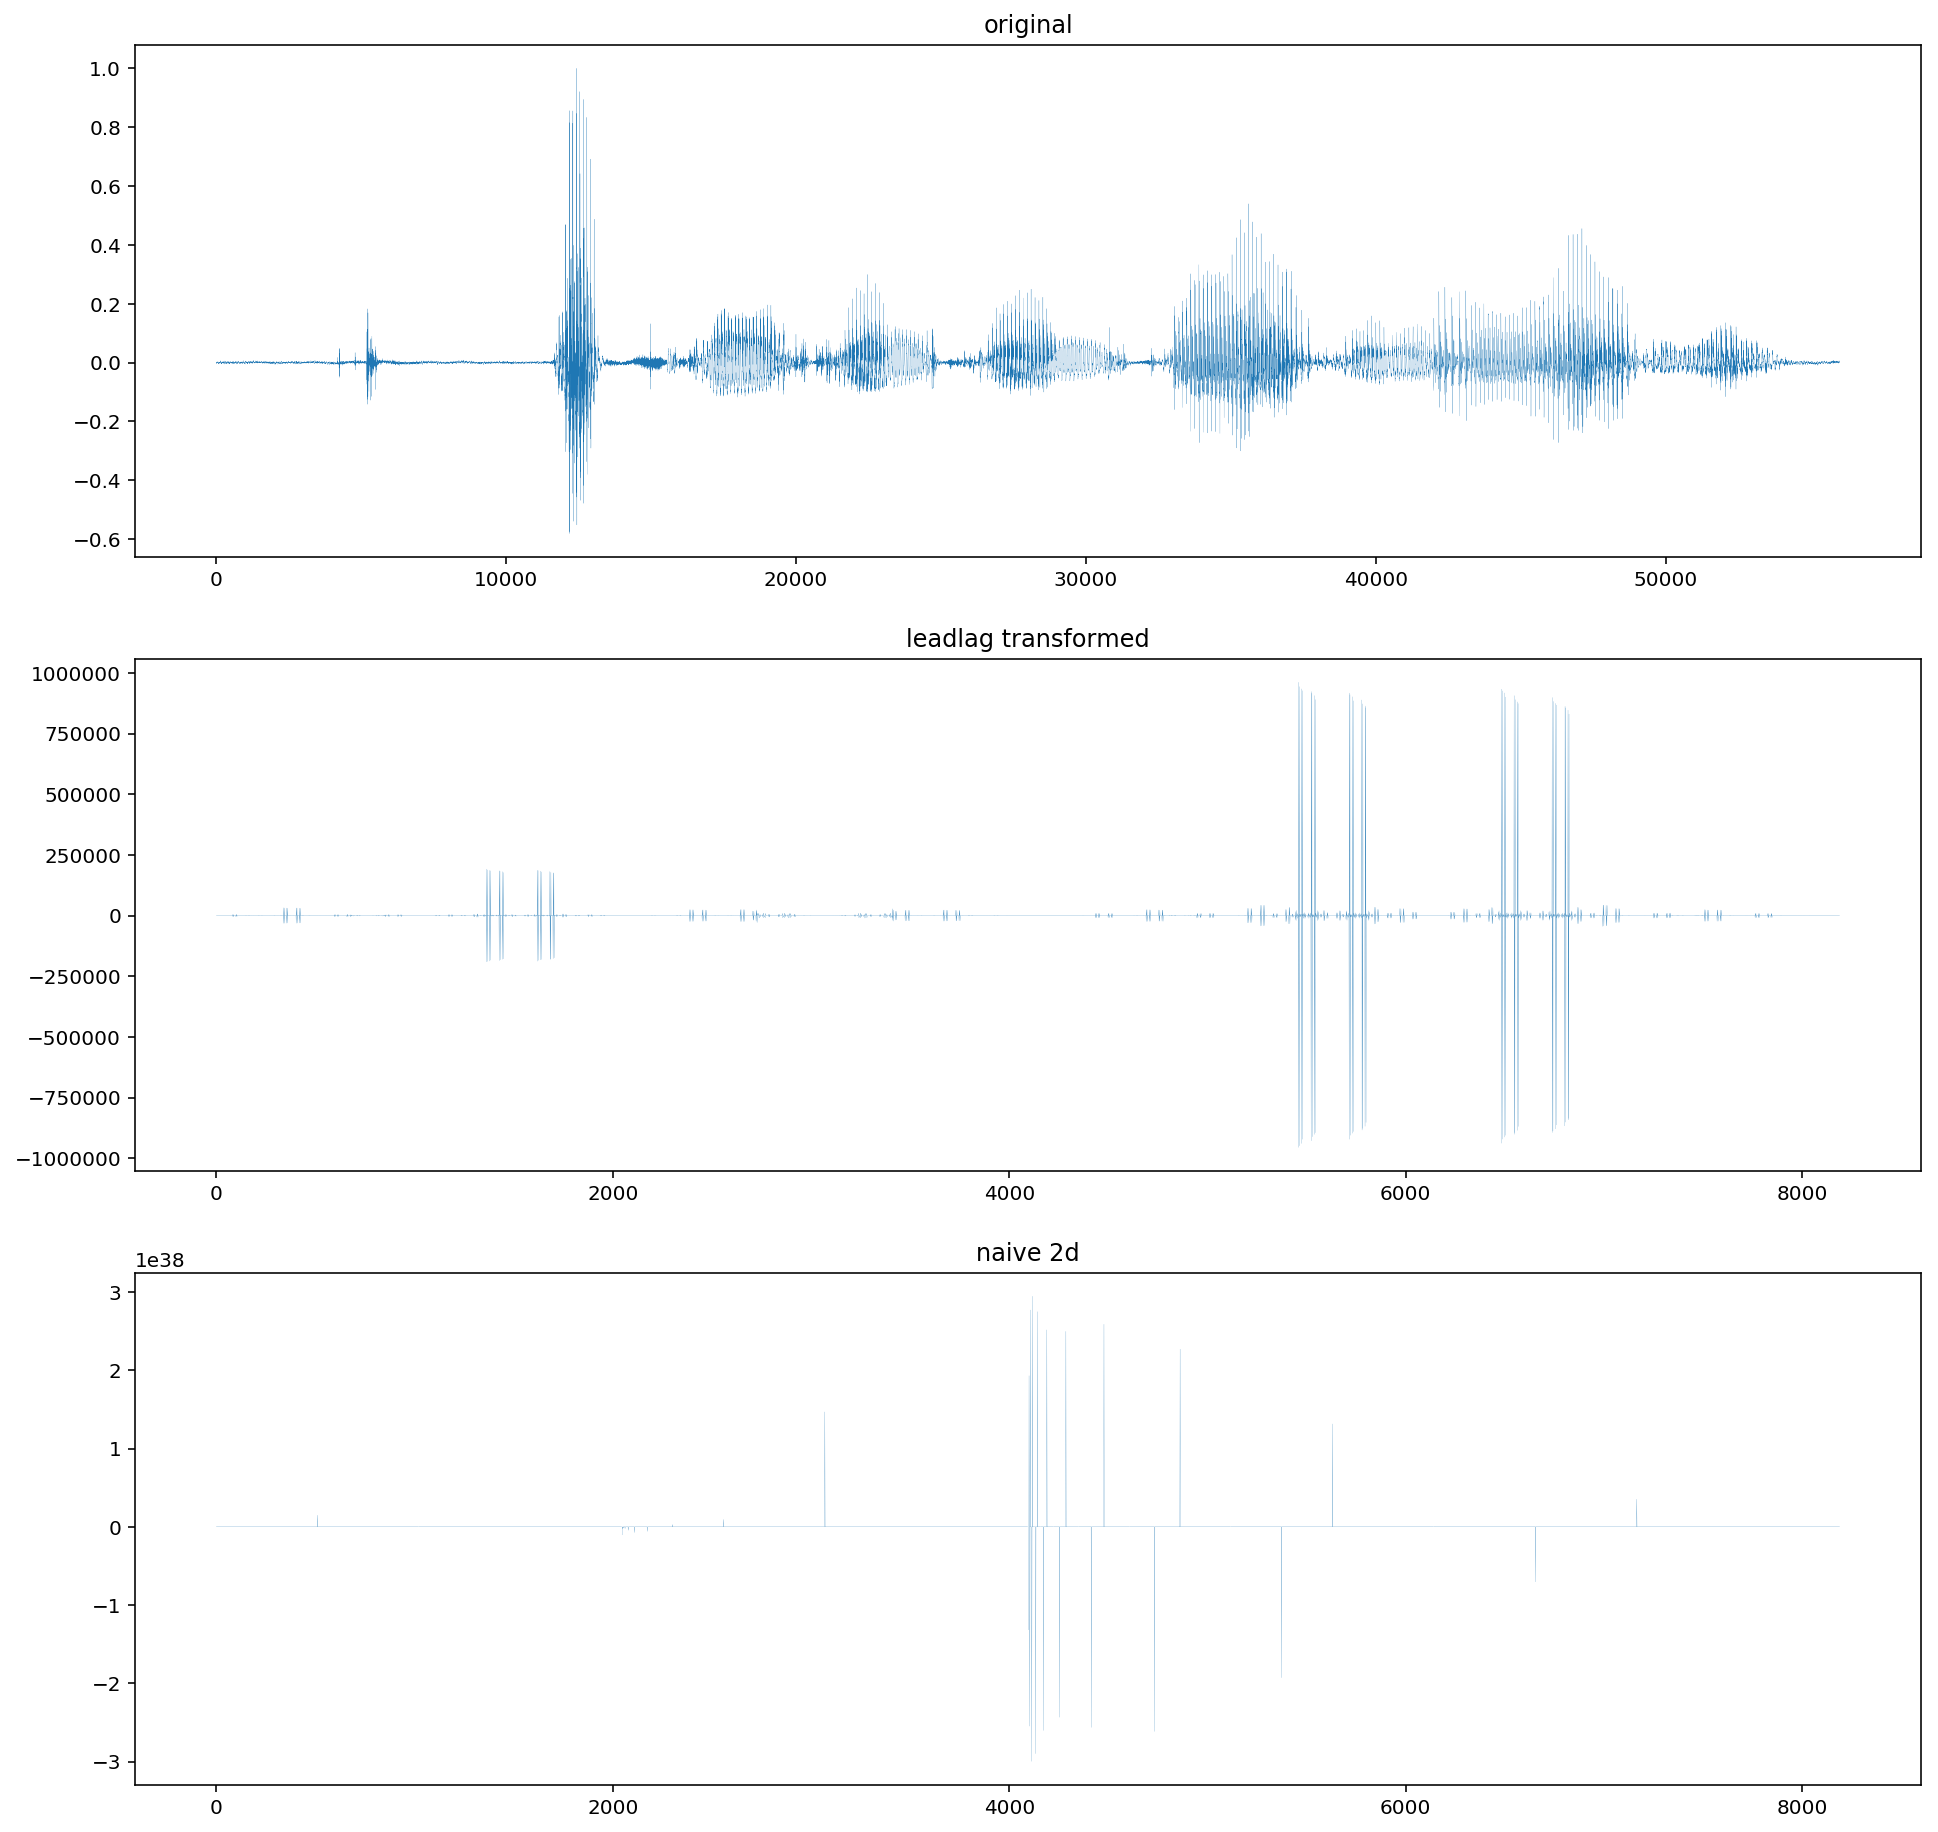

In [9]:
plotSig(3)

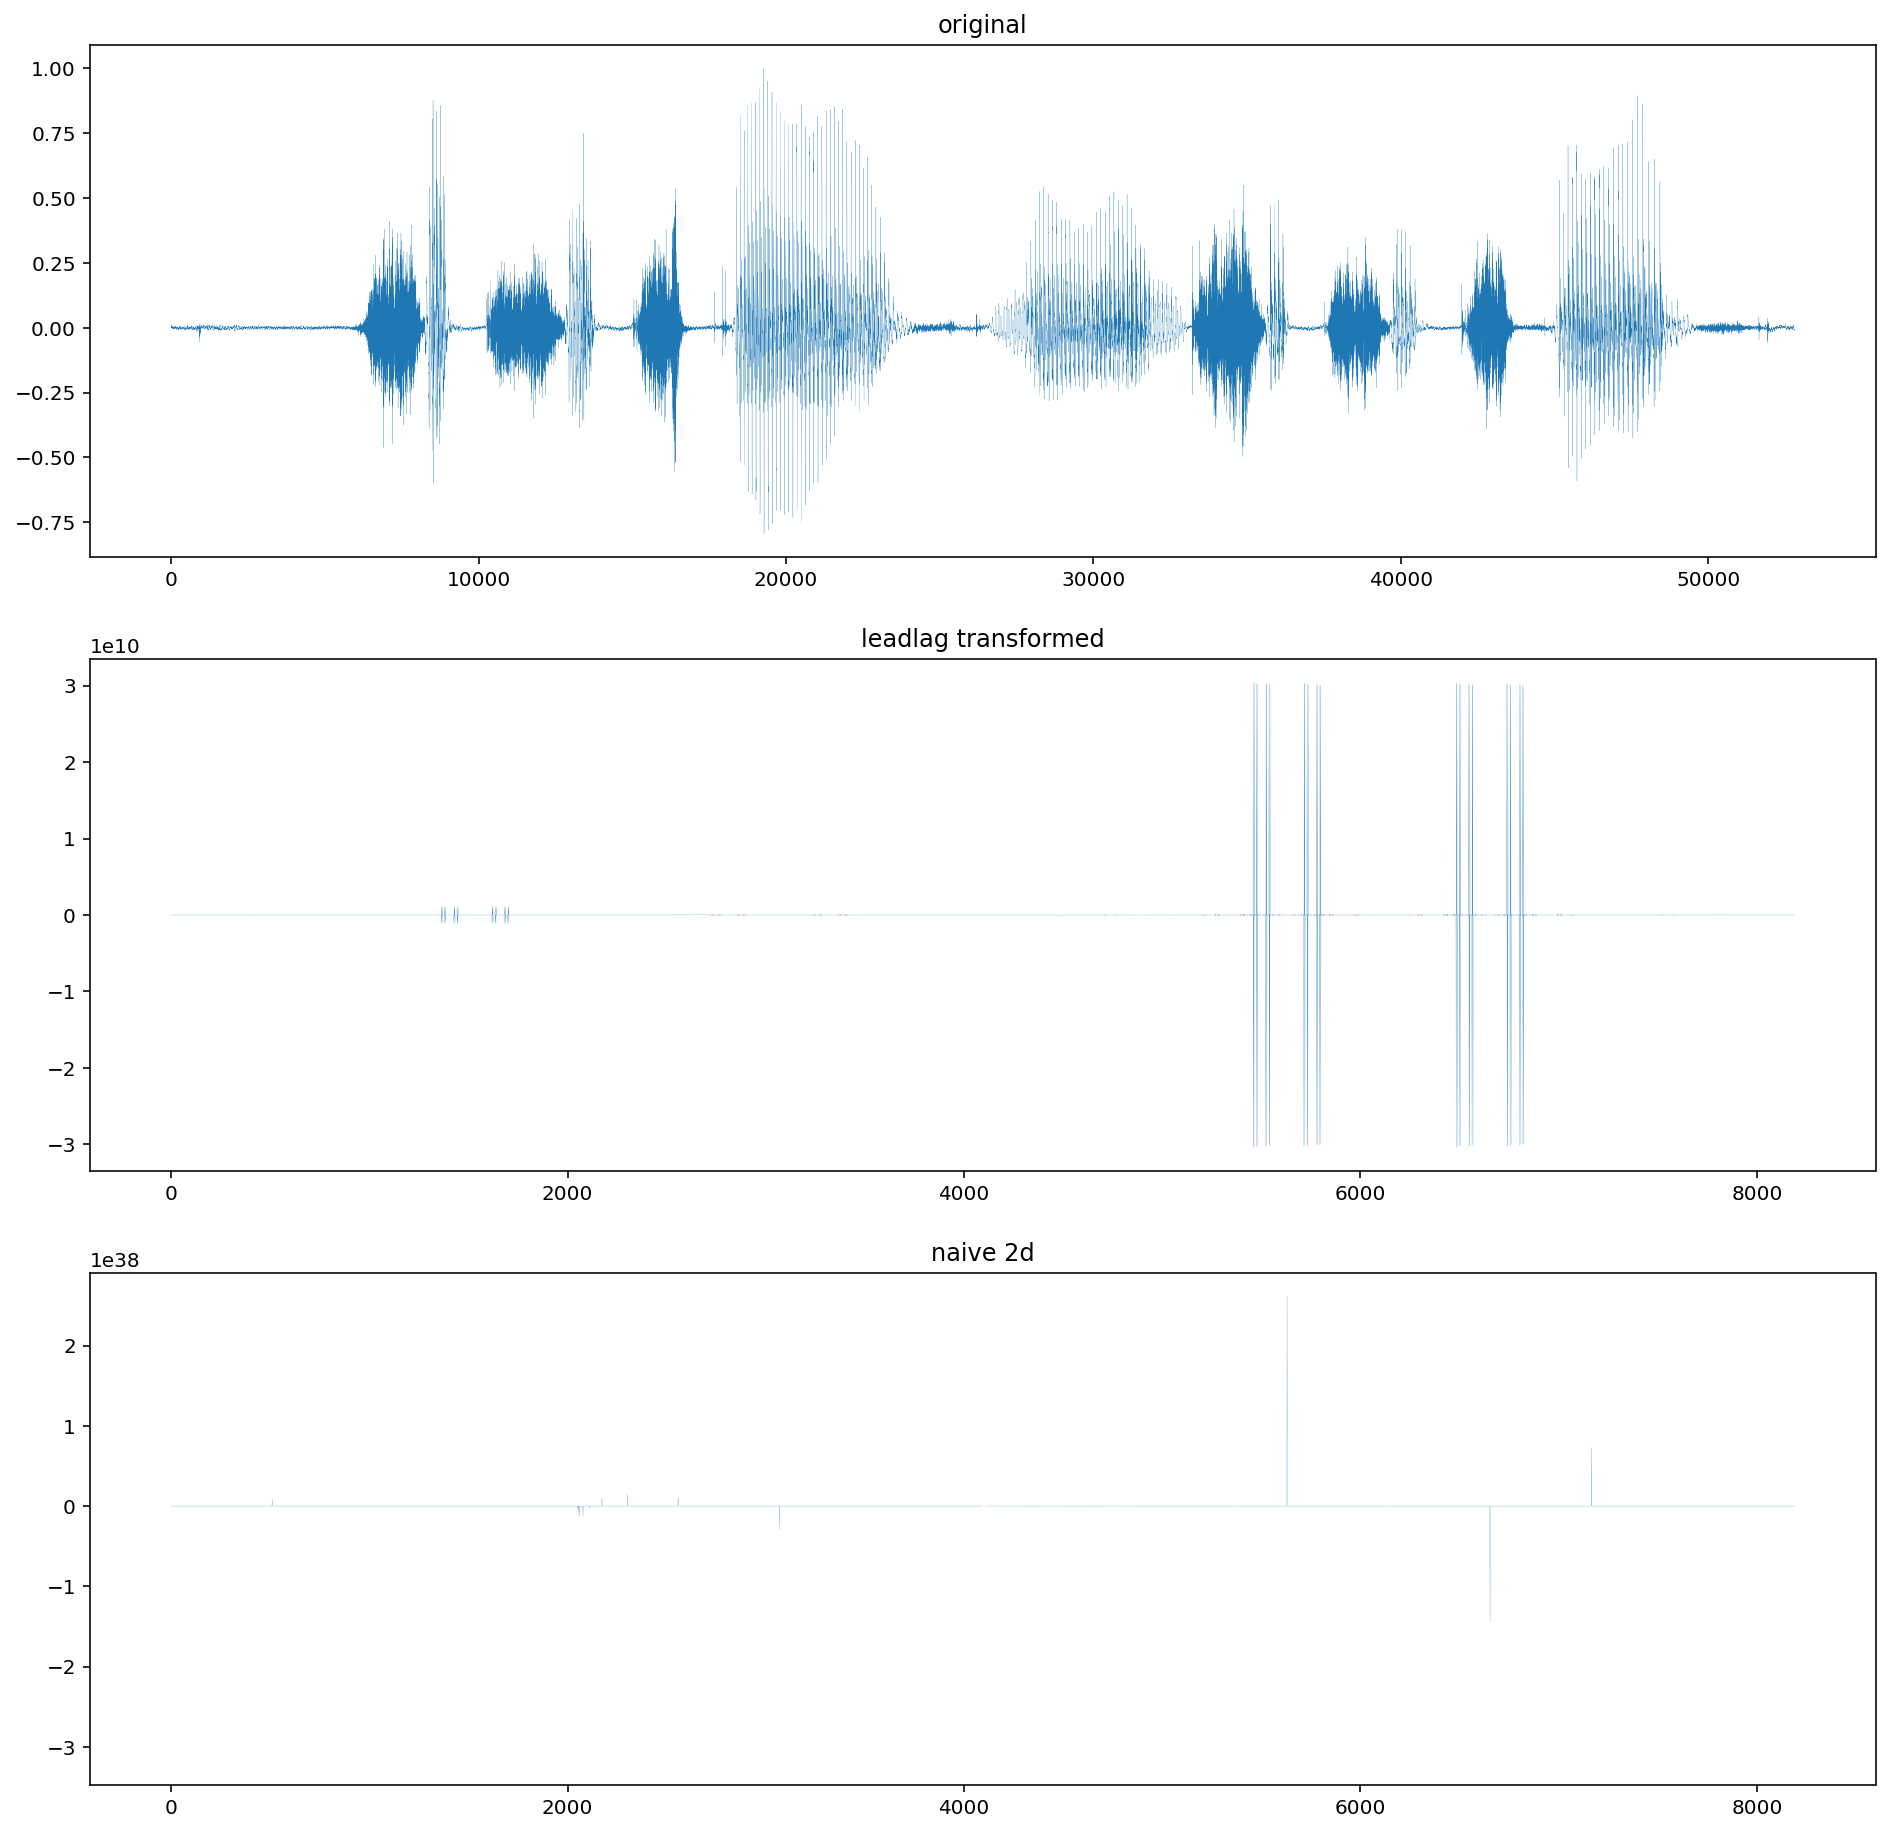

In [10]:
plotSig(5)

In [11]:
# play audio no.5
import pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, rate=16000, channels=1, output=True)
stream.write(X.iloc[5]['ZAudio'].astype('float32').tostring())
# reads: six six five, nine six six five

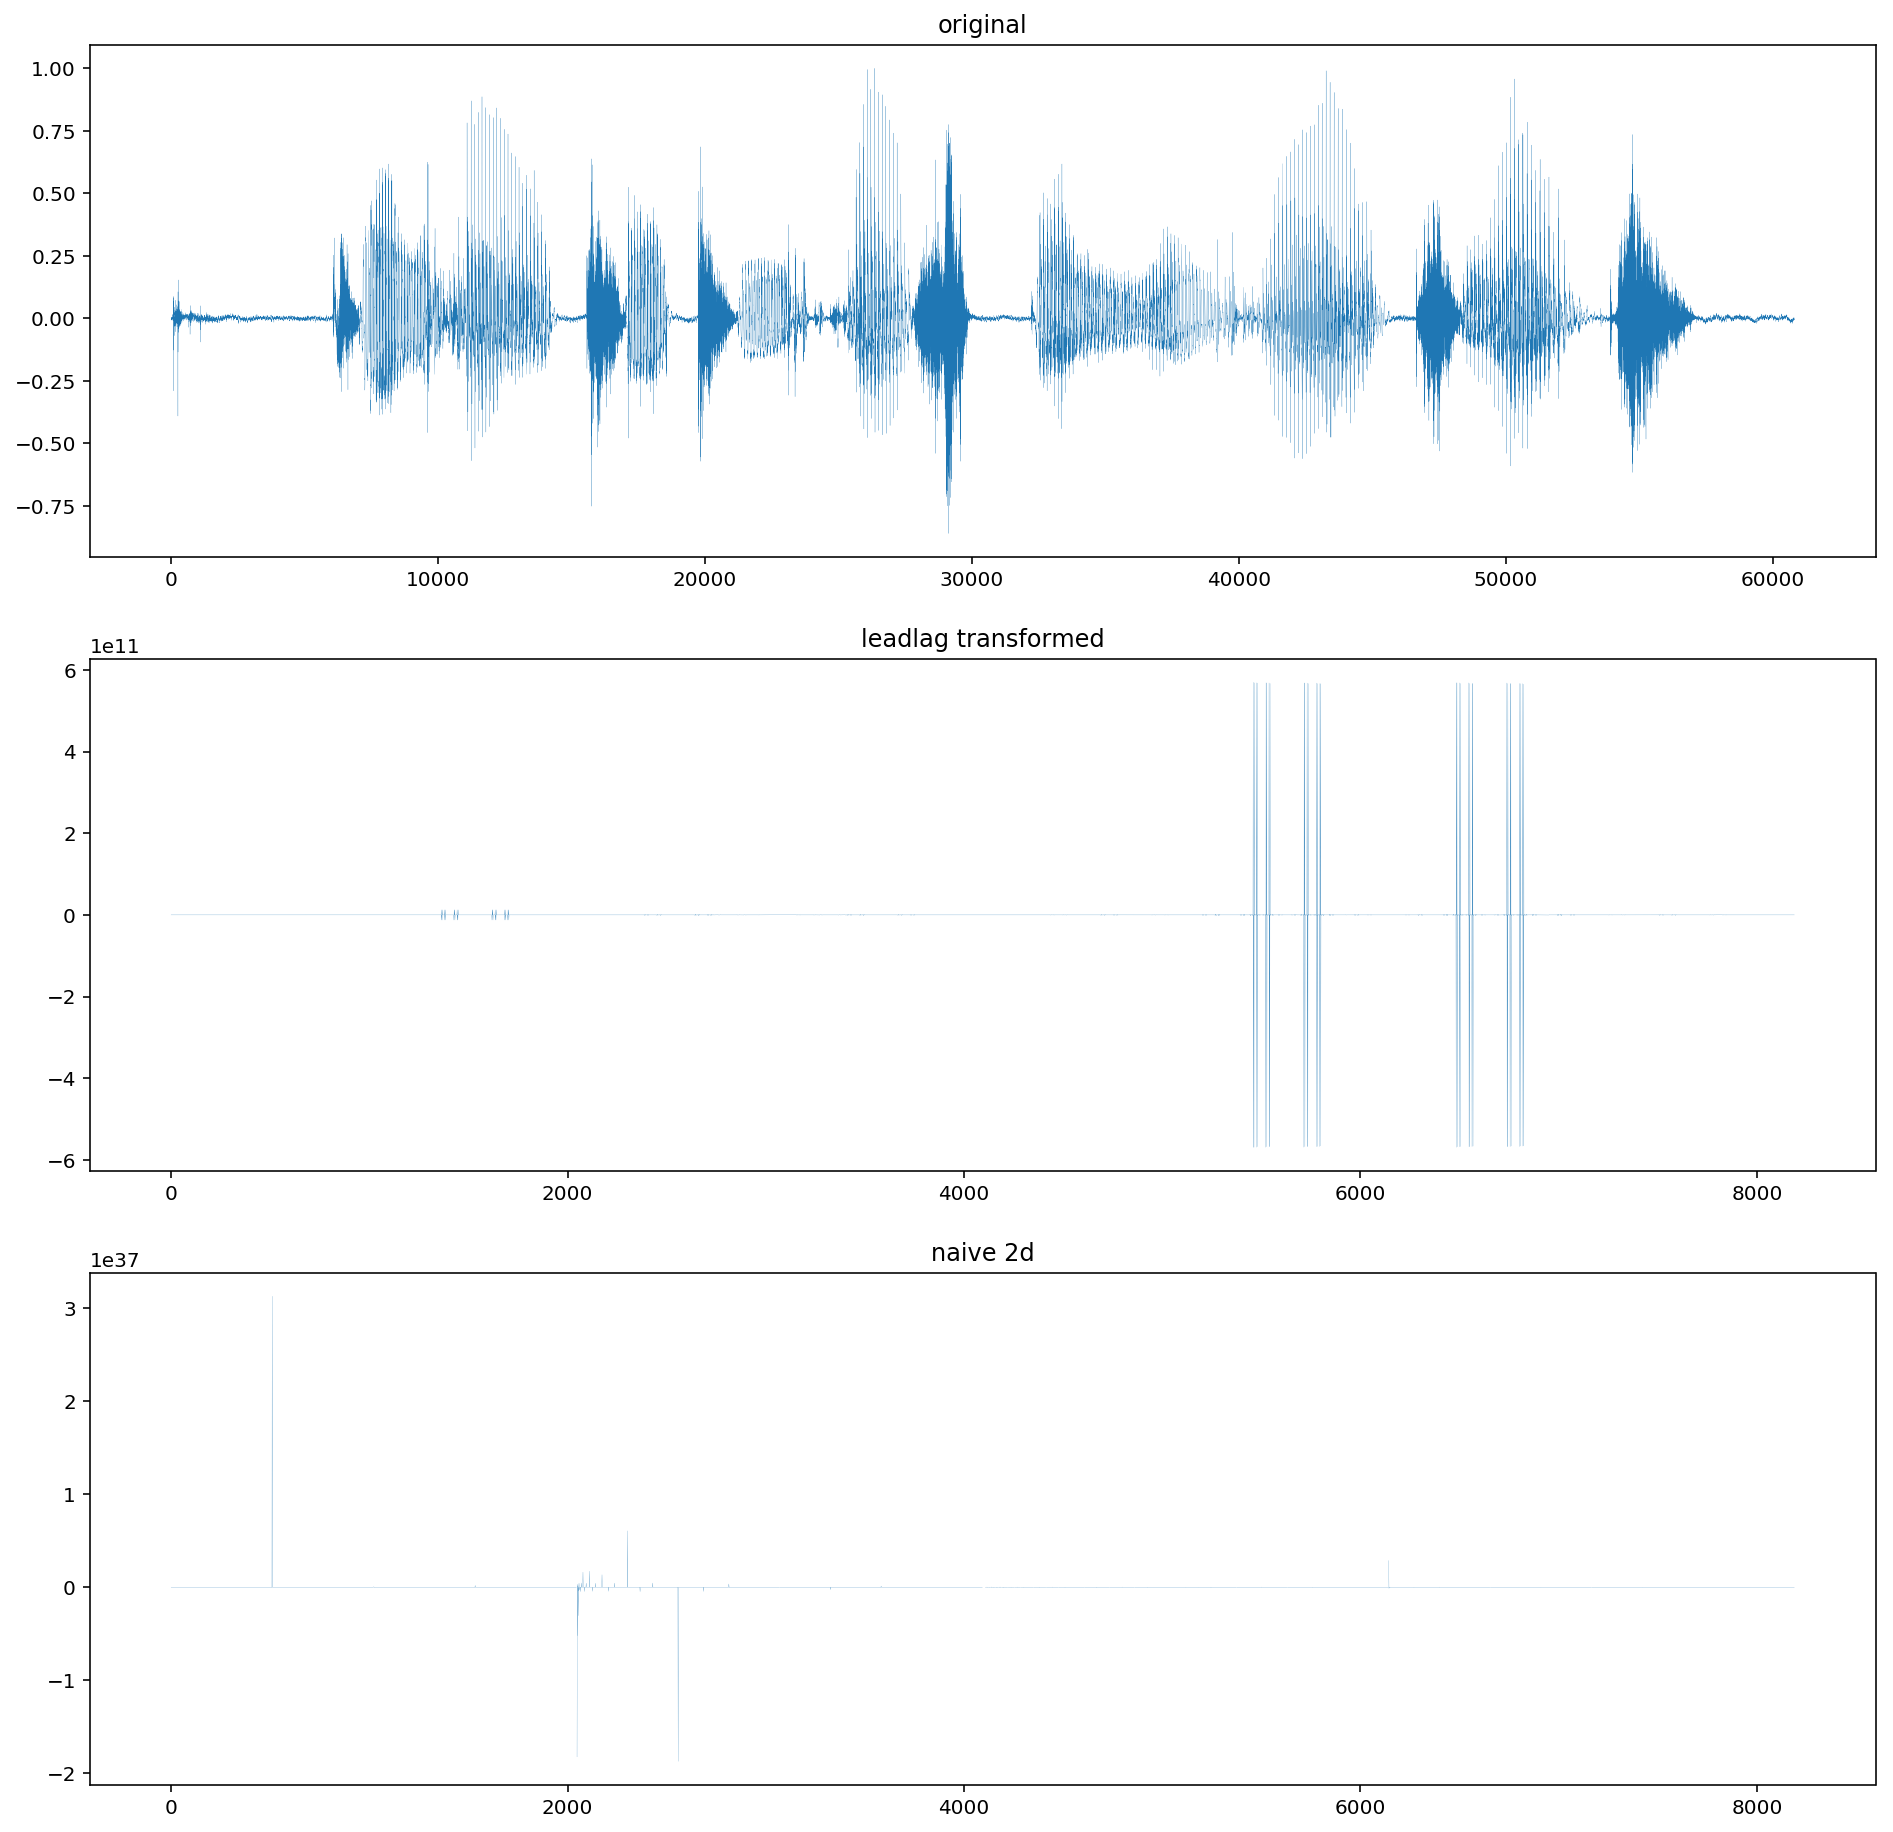

In [12]:
plotSig(8)

In [13]:
# create path from audio content
def leadlag(x):
    x1 = x
    x2 = np.roll(x1,1)
    x2[0] = x2[1]
    return np.vstack((x1,x2)).T

def sig12ll(x):
    return sig(leadlag(x),12)

def sig12nl(x):
    x1 = x
    x2 = np.linspace(0,len(x)-1,len(x))
    x2d = np.vstack((x2,x1)).T
    return sig(x2d,12)

In [14]:
# let's have a look at a sine

fs = 22050
dur = 5
x = np.linspace(0,dur,fs * dur,dtype='float64')
freq = 30

testtone = np.sin(2*np.pi*freq*x)


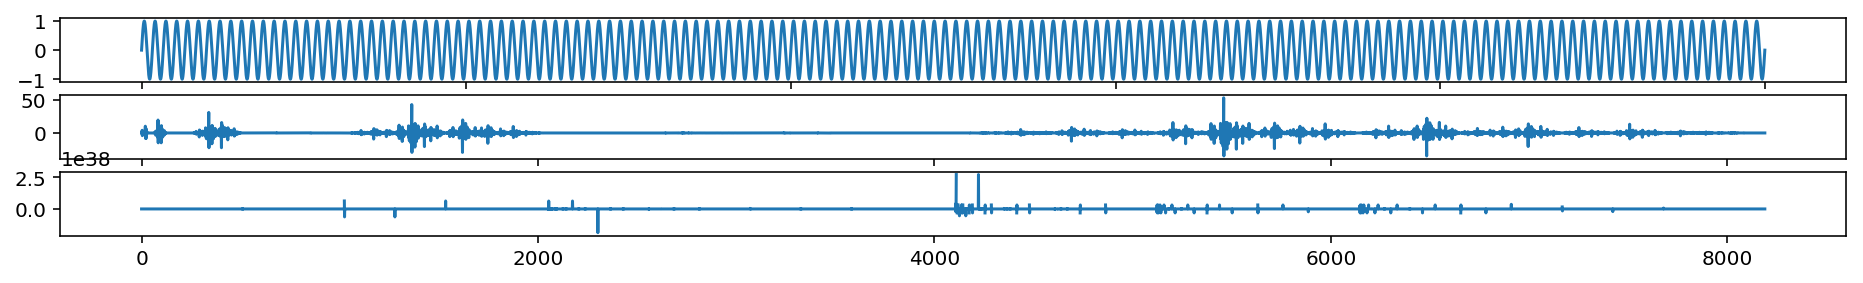

In [15]:
plt.figure(figsize=(16,2))
plt.subplot(311); plt.plot(x,testtone);
plt.subplot(312); plt.plot(sig12ll(testtone));
plt.subplot(313); plt.plot(sig12nl(testtone));

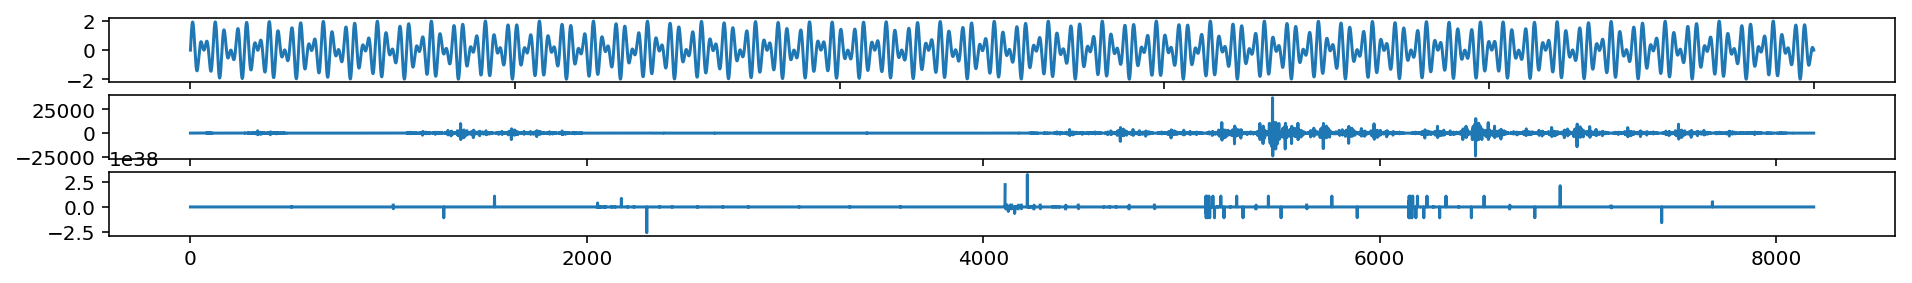

In [16]:
# let's add another sine

testtone2 = testtone + np.sin(2*np.pi*42.1*x)
plt.figure(figsize=(16,2))
plt.subplot(311); plt.plot(x,testtone2);
plt.subplot(312); plt.plot(sig12ll(testtone2));
plt.subplot(313); plt.plot(sig12nl(testtone2));

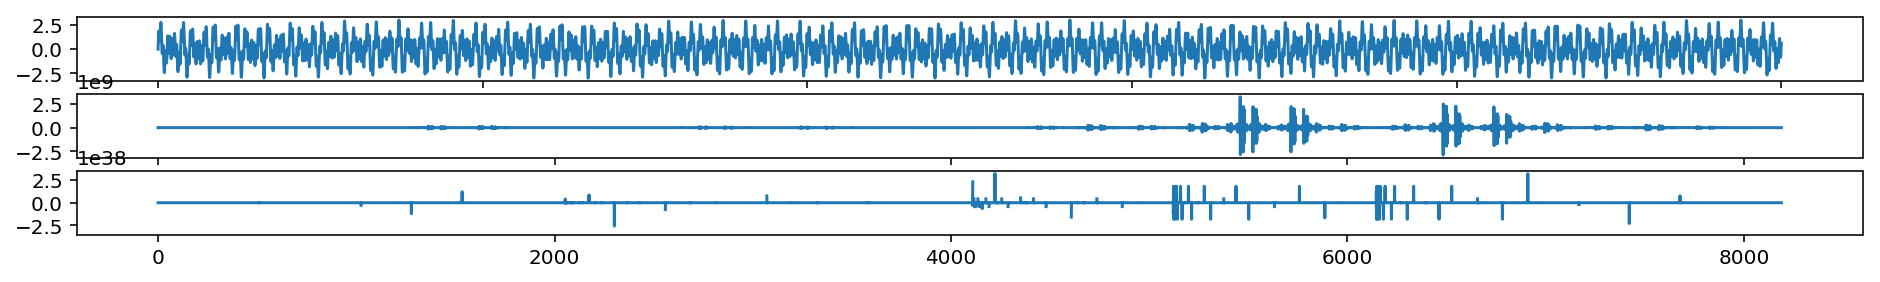

In [17]:
# now a 3rd

testtone3 = testtone2 + np.sin(2*np.pi*143.221*x)
plt.figure(figsize=(16,2))
plt.subplot(311); plt.plot(x,testtone3);
plt.subplot(312); plt.plot(sig12ll(testtone3));
plt.subplot(313); plt.plot(sig12nl(testtone3));

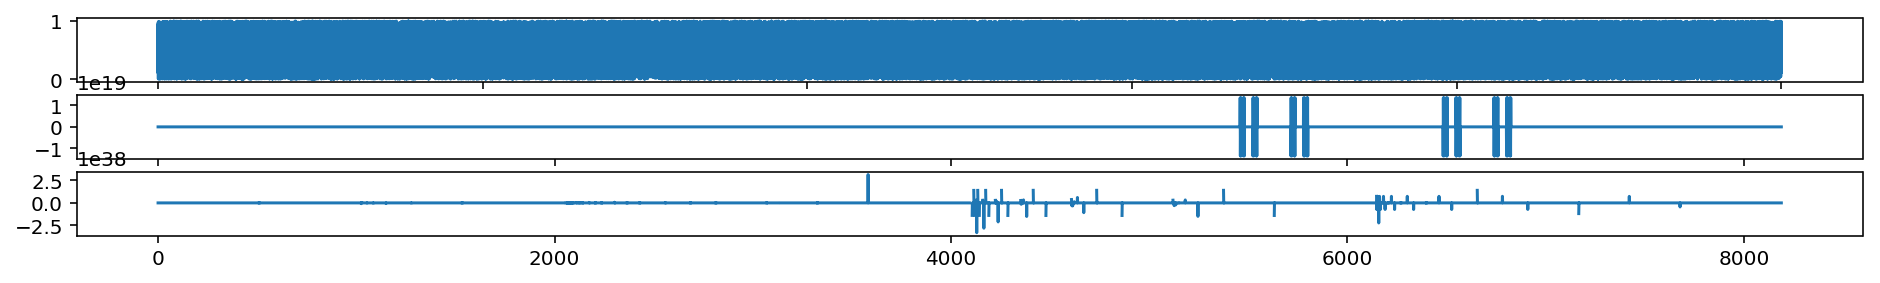

In [18]:
# compare to a noise signal
noise = np.random.rand(dur*fs)

plt.figure(figsize=(16,2))
plt.subplot(311); plt.plot(x,noise);
plt.subplot(312); plt.plot(sig12ll(noise));
plt.subplot(313); plt.plot(sig12nl(noise));